## On comparison of Policy iteration and Value iteration

In [24]:
import numpy as np
from dynamic_programming import DP
from envs.gridworld import GridworldEnv

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
nx = 10
ny = 10
env = GridworldEnv([nx,ny])

In [26]:
P = np.zeros(shape=(env.nA, env.nS, env.nS))
R = np.zeros(shape=(env.nS, env.nA))

for s in env.P.keys():
    for a in env.P[s].keys():
        p_sa, s_prime, r, done = env.P[s][a][0]
        P[a, s, s_prime] = p_sa
        R[s, a] = r

In [27]:
R

array([[ 0.,  0.,  0.,  0.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -

In [28]:
pd.DataFrame(R)

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...
95,-1.0,-1.0,-1.0,-1.0
96,-1.0,-1.0,-1.0,-1.0
97,-1.0,-1.0,-1.0,-1.0
98,-1.0,-1.0,-1.0,-1.0


In [29]:
pd.DataFrame(P[0,:,:])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
gamma = 1.0

In [31]:
pi = np.ones([env.nS, env.nA]) / env.nA # in [nS, nA]

In [32]:
R_pi

array([ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  0.])

In [33]:
R_pi = (pi * R).sum(axis=-1) # in [nS]
P_pi = np.einsum("na,anm->nm", pi, P) # from -> to

In [34]:
def get_direction_map(index):
    if index == 0:
        text = 'UP'
    
    if index == 1:
        text = 'RIGHT'
            
    if index == 2:
        text = 'DOWN'
    
    if index == 3:
        text = 'LEFT'
        
    return text

In [35]:
def policy_evaluation(pi, P, R, n_iter=50):
    R_pi = (pi * R).sum(axis=-1) # in [nS]
    P_pi = np.einsum("na,anm->nm", pi, P) # from -> to
    
    v_old = np.zeros(env.nS)
    for i in range(n_iter):
        v_new = R_pi + gamma * np.matmul(P_pi, v_old)
        v_old = v_new
        
    return v_new

def policy_improvement(pi, value_pi):
    q_pi = R_pi + P.dot(value_pi)
    pi_new = np.zeros_like(pi)
    pi_new[np.arange(q_pi.shape[1]), q_pi.argmax(axis=0)] = 1
    return pi_new

In [36]:
#pi = np.ones([env.nS, env.nA]) / env.nA # in [nS, nA]
pi_not_normalized = np.random.rand(env.nS, env.nA)
pi = pi_not_normalized / pi_not_normalized.sum(axis=-1).reshape(-1, 1)

In [37]:
v_pi = policy_evaluation(pi, P, R)
pi = policy_improvement(pi, v_pi)

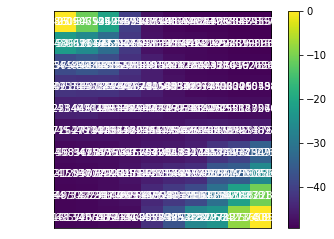

In [38]:
pi_viz = pi.reshape(nx, ny, -1).argmax(axis=-1)

fig, ax = plt.subplots(1,1)
hmap = ax.imshow(v_pi.reshape(nx, ny), 
                 interpolation='nearest')
cbar = ax.figure.colorbar(hmap, ax=ax)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

for i in range(ny):
    for j in range(nx):
        cell_v = v_pi.reshape(nx, ny)[nx-1-i, ny-1-j]
        ax.text(i,j,cell_v, ha="center", va="center", color="w")

In [39]:
pi_viz

array([[0, 3, 3, 3, 3, 3, 2, 2, 3, 3],
       [0, 0, 0, 3, 3, 3, 3, 3, 3, 2],
       [0, 0, 0, 3, 3, 3, 3, 2, 3, 2],
       [0, 0, 0, 3, 3, 3, 3, 2, 2, 2],
       [0, 0, 0, 0, 0, 3, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 2, 2, 2, 2],
       [0, 0, 0, 1, 2, 2, 1, 2, 1, 2],
       [0, 1, 1, 1, 2, 2, 1, 2, 2, 2],
       [1, 1, 1, 1, 1, 2, 2, 1, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

In [40]:
v_pi = policy_evaluation(pi, P, R)
pi = policy_improvement(pi, v_pi)

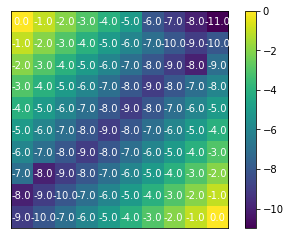

In [41]:
pi_viz = pi.reshape(nx, ny, -1).argmax(axis=-1)

fig, ax = plt.subplots(1,1)
hmap = ax.imshow(v_pi.reshape(nx, ny), 
                 interpolation='nearest')
cbar = ax.figure.colorbar(hmap, ax=ax)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

for i in range(ny):
    for j in range(nx):
        cell_v = v_pi.reshape(nx, ny)[nx-1-i, ny-1-j]
        ax.text(i,j,cell_v, ha="center", va="center", color="w")

In [42]:
pi_viz

array([[0, 3, 3, 3, 3, 3, 3, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 3, 3, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

array([[0, 3, 3, 3, 3, 3, 3, 3, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 3, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 2],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

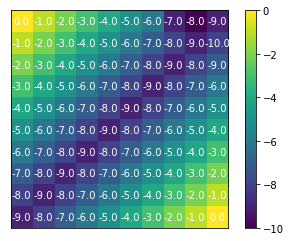

In [43]:
v_pi = policy_evaluation(pi, P, R)
pi = policy_improvement(pi, v_pi)

pi_viz = pi.reshape(nx, ny, -1).argmax(axis=-1)

fig, ax = plt.subplots(1,1)
hmap = ax.imshow(v_pi.reshape(nx, ny), 
                 interpolation='nearest')
cbar = ax.figure.colorbar(hmap, ax=ax)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

for i in range(ny):
    for j in range(nx):
        cell_v = v_pi.reshape(nx, ny)[nx-1-i, ny-1-j]
        ax.text(i,j,cell_v, ha="center", va="center", color="w")

pi_viz

array([[0, 3, 3, 3, 3, 3, 3, 3, 3, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 2],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

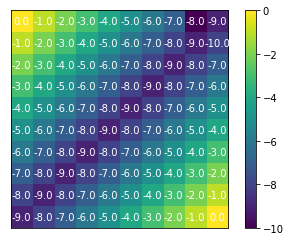

In [44]:
v_pi = policy_evaluation(pi, P, R)
pi = policy_improvement(pi, v_pi)

pi_viz = pi.reshape(nx, ny, -1).argmax(axis=-1)

fig, ax = plt.subplots(1,1)
hmap = ax.imshow(v_pi.reshape(nx, ny), 
                 interpolation='nearest')
cbar = ax.figure.colorbar(hmap, ax=ax)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

for i in range(ny):
    for j in range(nx):
        cell_v = v_pi.reshape(nx, ny)[nx-1-i, ny-1-j]
        ax.text(i,j,cell_v, ha="center", va="center", color="w")

pi_viz

array([[0, 3, 3, 3, 3, 3, 3, 3, 3, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 2],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

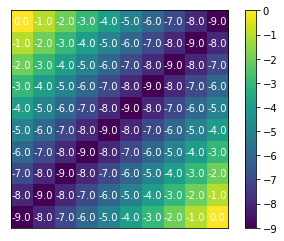

In [45]:
v_pi = policy_evaluation(pi, P, R)
pi = policy_improvement(pi, v_pi)

pi_viz = pi.reshape(nx, ny, -1).argmax(axis=-1)

fig, ax = plt.subplots(1,1)
hmap = ax.imshow(v_pi.reshape(nx, ny), 
                 interpolation='nearest')
cbar = ax.figure.colorbar(hmap, ax=ax)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

for i in range(ny):
    for j in range(nx):
        cell_v = v_pi.reshape(nx, ny)[nx-1-i, ny-1-j]
        ax.text(i,j,cell_v, ha="center", va="center", color="w")

pi_viz